### Time Series Analysis & Fotcasting on SuperStore Sales

In [74]:
# importing libreries which can be used 
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [67]:
# read the dataset 
df = pd.read_excel(r"C:\Users\niraj\OneDrive\Desktop\Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [68]:
# checking about the description
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### preprocess of Data 

In [69]:
# remove unnecessary column
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(cols, axis = 1, inplace = True)
df.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [70]:
# sort order date
df=df.sort_values("Order Date")
df.head(5)

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [71]:
# check missing values
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [72]:
# grouping sales bt order-date
df.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [73]:
#set min&max as orderdate
df["Order Date"].min()
df["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [80]:
# order date as index
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [54]:
## daily sales value for each month
## start of each month as the timestamp
y = df["Sales"].resample("MS").mean()
y["2017":]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

### Visualization of Dataset

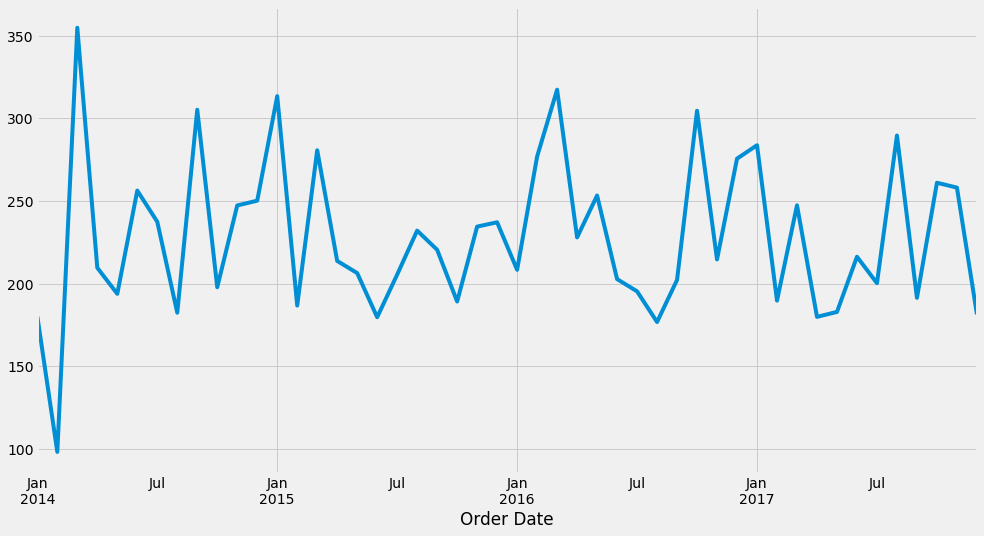

In [56]:
y.plot(figsize =(15,8))
plt.show()

### Time Series Decompostion
#### Trend
##### seasonality
###### Noise

In [59]:
from pylab import rcParams

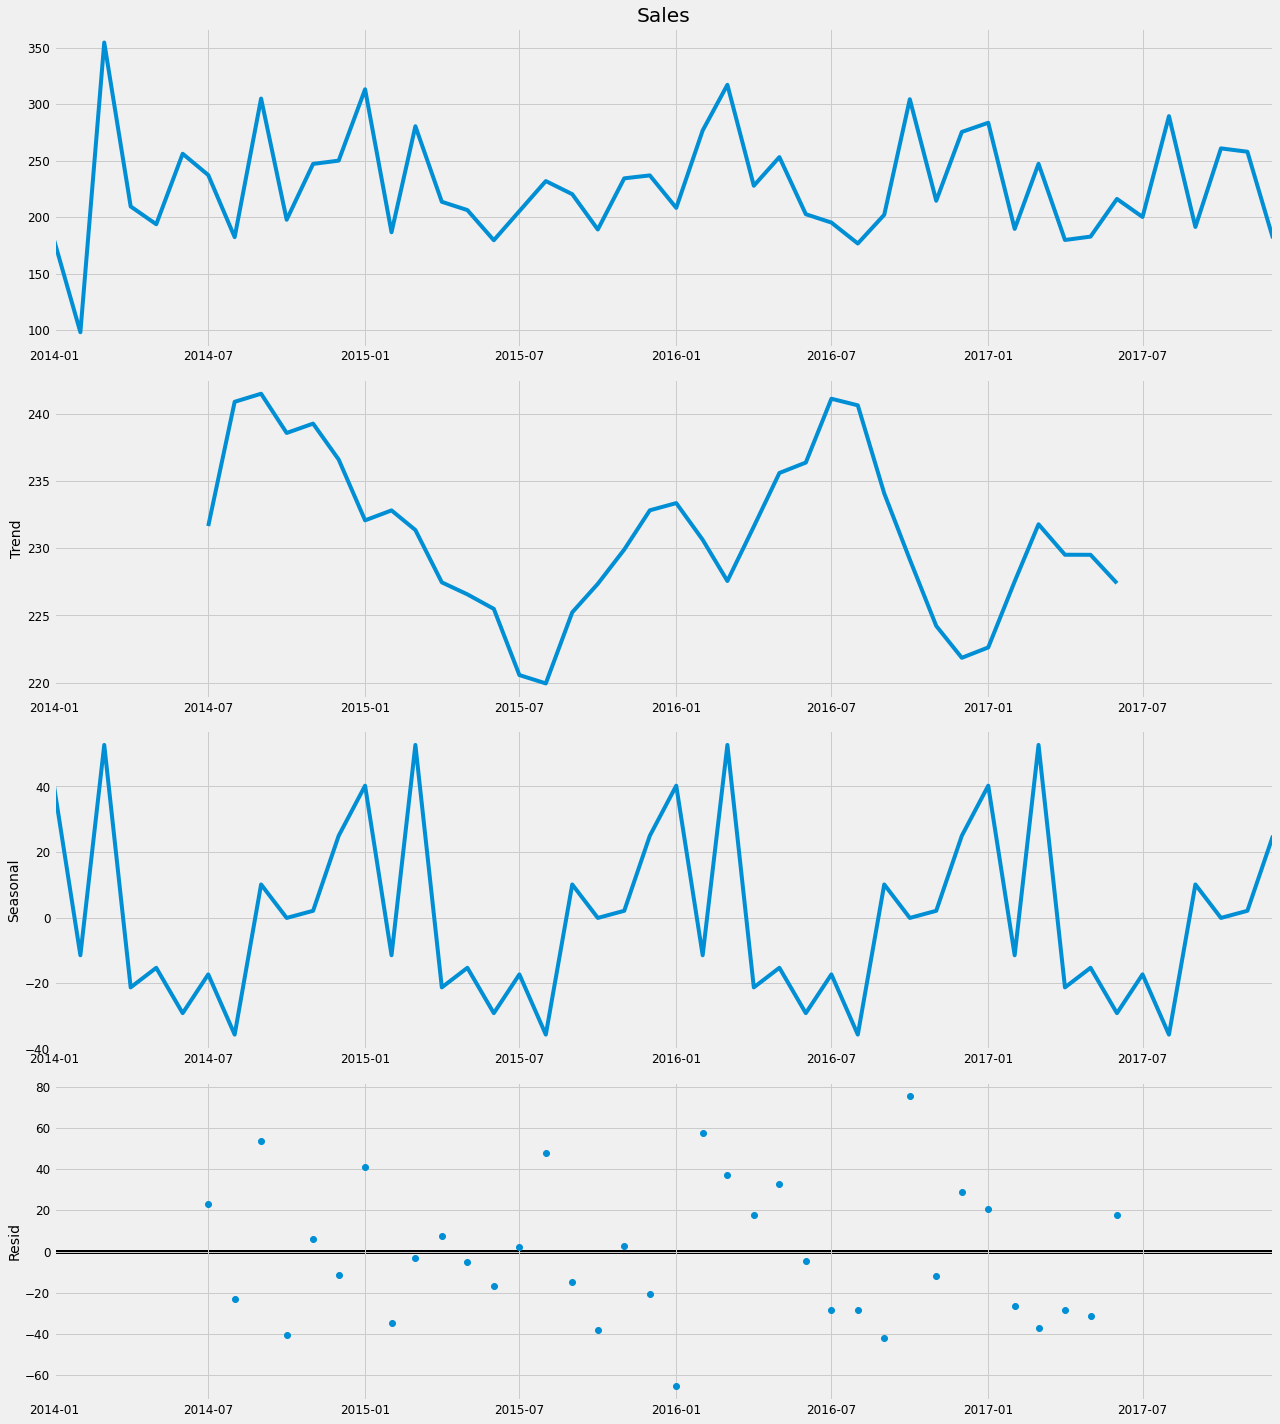

In [81]:
rcParams["figure.figsize"] = 18,20
decompos = sm.tsa.seasonal_decompose(y,model = "addtitive")
fig = decompos.plot()
plt.show()

# Time Series Forcasting ARIMA Model
#### About Arima model
###### ARIMA stands for Autoregressive Integreted Moving Average
###### 

In [82]:
# set typical ranges for p,d,q
p = d = q = range(0,2)

In [88]:
# posibile combination for p,d and q
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print("examplrs of parameter combination for seasonal arima")
print("sarimax:{} x {}".format(pdq[1], seasonal_pdq[1]))
print("sarimax:{} x {}".format(pdq[2], seasonal_pdq[3]))
print("sarimax:{} x {}".format(pdq[1], seasonal_pdq[4]))

examplrs of parameter combination for seasonal arima
sarimax:(0, 0, 1) x (0, 0, 1, 12)
sarimax:(0, 1, 0) x (0, 1, 1, 12)
sarimax:(0, 0, 1) x (1, 0, 0, 12)


In [91]:
# grid search find the optima; set of parameters that yields
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1879.1349663894823
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.07466784791603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.8202649808121
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131277075


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1989.0720860582187
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.7387013652833
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987749
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.707337667064


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2547.1917151525345
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.05723836320584
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.3073903083564
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871073651


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2281.876036036796
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.265248438464
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.1166245099315
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537606
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1885.997938072082
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987149972
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.7711868200486
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055297


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1672.2709432430772
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241603003
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.0349618610091
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718209


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1452.9014645541617
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.5664610839775
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.2311417946108
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.00994558513275


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1898.8259570831492
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.0933287553444
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684763634
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048915806


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2362.922533310284
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756224
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.38088151786843
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.927285794978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2115.054653039224
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.2757103427844
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.1471414739059


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9336813149733


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2106.7296641546336
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.50341283438905
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.0752637441319


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7221988393909
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1983.1667132795621
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.08182424062943
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.92673791539323
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467401


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1874.518412920546
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080553815
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.6717666867989
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870398


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1889.5464748916859
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.85308065729924
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.49865808163383
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933251


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1893.101402535719
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080713395
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.0251886260906
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.522477370219


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1859.7882585456102
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643713
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.81171398679487


### Adjust the ARIMA Model


In [93]:
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])
###Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1391   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


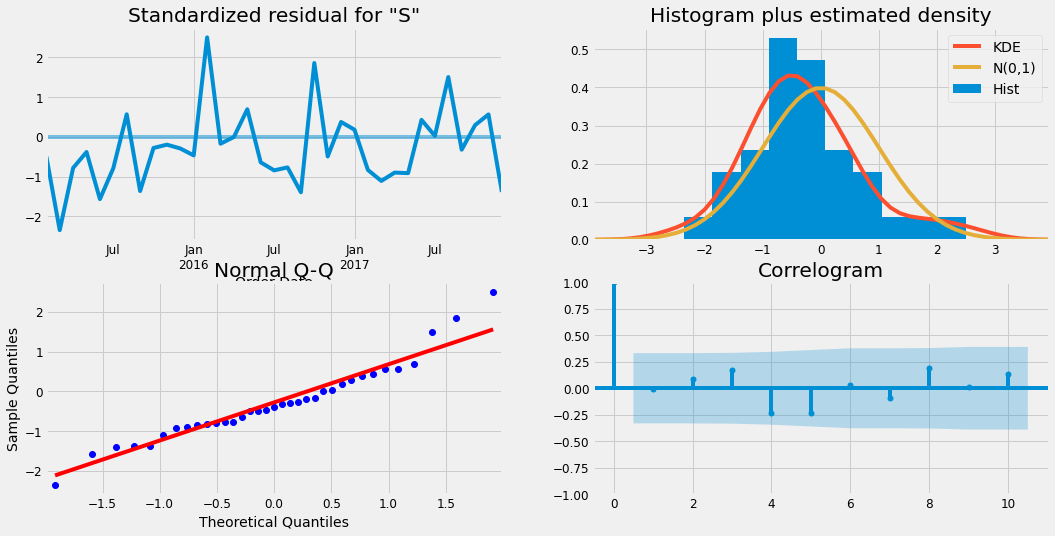

In [94]:
#model diagnostic to investigate any unusal behavior
result.plot_diagnostics(figsize = (16,8))
plt.show()

## Validating Forcasts
###### To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [96]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949835,380.855433
2017-02-01,128.374780,341.873710
2017-03-01,201.126557,414.265410
2017-04-01,122.357194,335.174989
2017-05-01,126.153434,338.683174
2017-06-01,87.013285,299.283135
2017-07-01,92.953021,304.987207
2017-08-01,102.323364,314.142878
2017-09-01,103.098065,314.721214


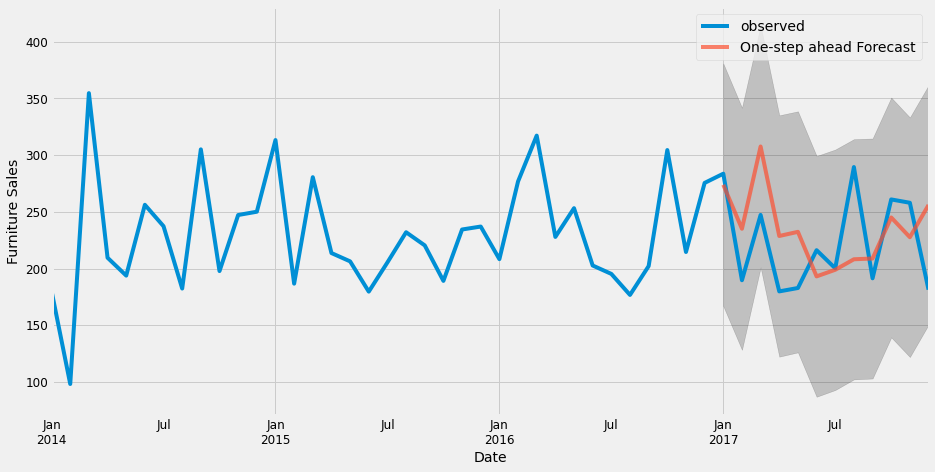

In [97]:
# visualizing the forcasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

### Error Analysis

In [98]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


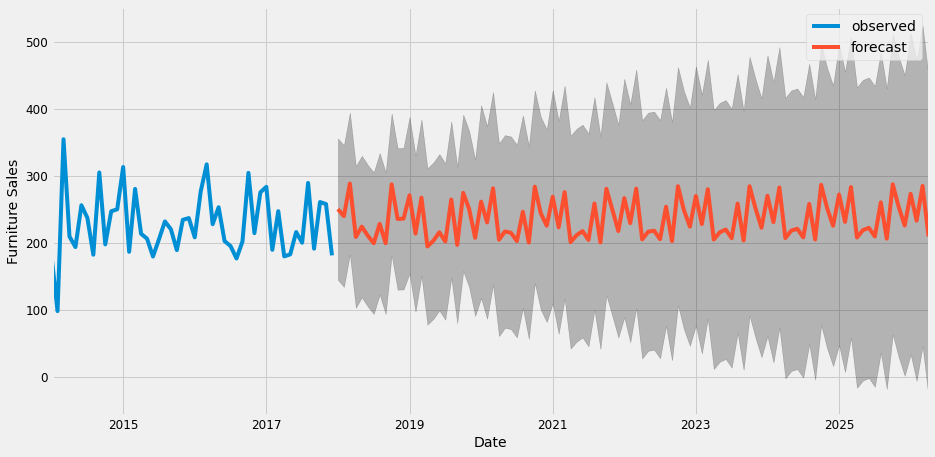

In [99]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Summary
1.Our model clearly captured furniture sales seasonality

2.As we forecast further out into the future, it is natural for us to become less confident in our values.

3.This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.
​